<a href="https://colab.research.google.com/github/fashfaq2000/data-science/blob/main/Deep_Learning_with_Keras_Faisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

In [3]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Download the dataset and load it into a pandas DataFrame
df = pd.read_csv(DATA_PATH, header=None)

In [4]:
# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
df.shape

(32561, 15)

In [6]:
# values represented? What's the percentrage of positive cases in the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Find all NULL values
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [8]:
# Drop them NULL values
df.dropna(inplace=True)

In [9]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
le = LabelEncoder()
df[14] = le.fit_transform(df[14])
df[14].head()

,14
0,0
1,0
2,0
3,0
4,0


In [10]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(14, axis=1), df[14], test_size=0.2, random_state=42)

In [12]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the positive class
y_pred = np.ones(y_test.shape)
roc_auc_score(y_test, y_pred)

0.5

In [13]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the categorical variables in workclass, education, marital-status, occupation, relationship, 'race', sex, and native-country.
categorical_features = [1, 3, 5, 6, 7, 8, 9, 13]
ct = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

#Also, apply MinMaxScaler to the remaining continuous features.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# How many columns will the dataframe have after these columns transformations are applied
num_columns = X_train.shape[1]
print(f"Number of columns after transformations: {num_columns}")

Number of columns after transformations: 108


In [15]:
# Define the Keras model
def create_model():
    # Create a Sequential model
    model = Sequential()
    # Add a dense layer with 12 units, using the relu activation function
    model.add(Dense(12, input_dim=108, activation='relu'))
    # Add another dense layer with 1 unit and the sigmoid activation function
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model using binary_crossentropy as the loss function, the adam optimizer, and accuracy as the metric
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Return the compiled model
    return model

In [17]:
# Create a Kerasclassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

In [18]:
# Create the scikit-learn pipeline
pipeline = Pipeline([
    ('model', model)
])

In [20]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pipeline(steps=[('model',
                 KerasClassifier(batch_size=32, epochs=10, model=<function create_model at 0x7ca315bc4820>, verbose=0))])

In [21]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random? Answer is YES
y_pred = pipeline.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7843521449707762

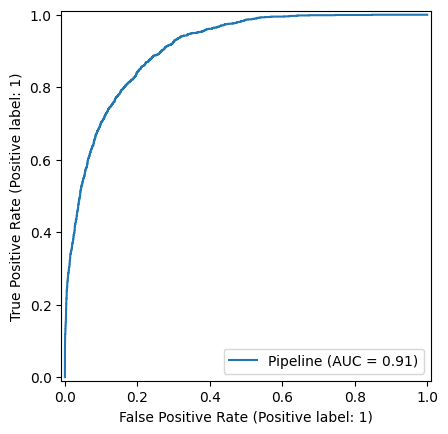

In [22]:
# Generate an ROC curve for your model.
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)